In [1]:
%reload_ext autoreload
%autoreload 2

from func import *
import pandas as pd
import pickle
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler




In [2]:
filename = 'all_data_anonymized.csv'
date_col = 'todate'
start_date = '1980-01-01'
seperator = ';'
fill = 0
lim = 5
df_read = load_and_preprocess_data(filename, date_col, start_date, seperator, fill, lim)


c:\Users\osaz001\Master-thesis\Files\func.py:26: DtypeWarning: Columns (15,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_read = pd.read_csv(filename, sep=seperator)


In [3]:
windows = [5, 10, 20, 40, 60, 100, 180, 240, 360, 480]
window_m = [10, 30, 60, 100, 180]
assets = df_read.columns
df_feat = add_features(df_read, window_m)

In [4]:
target_days = 10
cross = False
return_column_shift = 'avgreturn'
volatility_column_shift = 'volatility'
df = add_y_col(df_feat, df_read, date_col, target_days, return_column_shift, volatility_column_shift, cross)

In [5]:
X_train, X_eval, X_test, y_train, y_eval, y_test, X_train_eval, y_train_eval = prepare_training_dataset(df, date_col, shuffle=False, train_split=0.25, eval_split=0.25)

In [7]:
# load all models
%reload_ext autoreload
%autoreload 2
"""NN_model = load_model('NN_model.h5')
ridge_best = pickle.load(open('ridge_model.pickle', 'rb'))
lgb_best = pickle.load(open('lgb_model.pickle', 'rb'))
xgb_best = pickle.load(open('xgb_model.pickle', 'rb'))"""
"""param_grid_NN = {
    'optimizer': ['adam', 'rmsprop'],
    'epochs': [50],  # You can adjust or extend this list
    'batch_size': [32, 64]
}"""
param_grid_NN =  {'batch_size': [64], 'epochs': [50], 'optimizer': ['rmsprop']}

NN_model, best_params, X_test_scaled = optimize_and_train_NN(X_train, y_train, X_eval, y_eval, X_test, param_grid_NN, cross)



#param_grid_alpha = {'alpha': [0.1, 1.0, 10.0]}
param_grid_alpha = {'alpha': [1.0]}
ridge_best, grid_search = optimize_and_train_ridge(X_train, y_train, X_train_eval, y_train_eval, param_grid_alpha, cross)



"""param_grid_xgb = {
    'max_depth': [3, 6, 10],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}"""

param_grid_xgb = {'learning_rate': [0.01], 'max_depth': [3], 'n_estimators': [200]}

xgb_best, best_params = optimize_and_train_xgb(X_train, y_train, X_eval, y_eval, param_grid_xgb, cross)

"""param_grid_lgb = {
    'max_depth': [3, 6, 10],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 63, 127, 255]
}"""

param_grid_lgb = {'learning_rate': [0.01], 'max_depth': [3], 'n_estimators': [200], 'num_leaves': [31]}

lgb_best, best_params = optimize_and_train_lgb(X_train, y_train, X_eval, y_eval, param_grid_lgb, cross)


c:\appl\Anaconda3\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\appl\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best hyperparameters: {'batch_size': 64, 'epochs': 50, 'optimizer': 'rmsprop'}
Epoch 1/50


c:\appl\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1522/1522 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5621 - loss: 0.2452 - val_accuracy: 0.5995 - val_loss: 0.2388
Epoch 2/50
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5844 - loss: 0.2402 - val_accuracy: 0.5933 - val_loss: 0.2392
Epoch 3/50
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5888 - loss: 0.2382 - val_accuracy: 0.5859 - val_loss: 0.2409
Epoch 4/50
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5950 - loss: 0.2366 - val_accuracy: 0.5945 - val_loss: 0.2416
Epoch 5/50
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5984 - loss: 0.2354 - val_accuracy: 0.5856 - val_loss: 0.2439
Epoch 6/50
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6060 - loss: 0.2328 - val_accuracy: 0.5916 - val_loss: 0.2424
Epoch 7/50
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6074 - loss: 0.2323 - val_accuracy: 0.5798 - val_loss: 0.2440
Epoch 8/50
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6120 - loss: 0.2315 - val_accurac

c:\appl\Anaconda3\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
[LightGBM] [Info] Number of positive: 52480, number of negative: 44888
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008803 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8160
[LightGBM] [Info] Number of data points in the train set: 97368, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538986 -> initscore=0.156262
[LightGBM] [Info] Start training from score 0.156262
Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'num_leaves': 31}
[LightGBM] [Info] Number of positive: 107543, number of negative: 87193
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024099 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8160
[LightGBM] [Info] Number of data points in the train set

In [8]:
# Store predictions in a dictionary
predictions = {
    "Ridge Classifier": ridge_best.predict(X_test),
    "XGBoost Classifier": xgb_best.predict(X_test),
    "LightGBM Classifier": lgb_best.predict(X_test),
    "Neural Network": NN_model.predict(X_test_scaled)
}   

# Iterate through the dictionary and evaluate each model
for model_name, y_pred in predictions.items():
    print(model_name + ":")
    if model_name == "Neural Network":
        y_pred = (y_pred > 0.5).astype(int)
    evaluate_model_performance(y_test, y_pred)
    print("\n")


6086/6086 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
Ridge Classifier:
Accuracy: 0.5843573640345697
Confusion Matrix:
[[17912 69993]
 [10948 95884]]
Precision: 57.80427666282848
Recall: 89.7521341920024
F1 Score: 70.31964474953155
MSE: 41.56426359654303
RMSE: 64.47035256344037


XGBoost Classifier:
Accuracy: 0.601765458028007
Confusion Matrix:
[[33863 54042]
 [23509 83323]]
Precision: 60.65810068066829
Recall: 77.9944211472218
F1 Score: 68.24244360086324
MSE: 39.8234541971993
RMSE: 63.105827145517466


LightGBM Classifier:
Accuracy: 0.6009335668106215
Confusion Matrix:
[[33652 54253]
 [23460 83372]]
Precision: 60.57910990009082
Recall: 78.04028755429086
F1 Score: 68.20995103433324
MSE: 39.90664331893785
RMSE: 63.171705152653466


Neural Network:
Accuracy: 0.5904527644977585
Confusion Matrix:
[[32728 55177]
 [24577 82255]]
Precision: 59.851417428255424
Recall: 76.99472068294145
F1 Score: 67.34926145481937
MSE: 40.954723550224145
RMSE: 63.9958776408482




In [9]:
# keep same index from X_test in df as new df

df_2 = df.loc[X_test.index]
# Use the dates in df_2 to filter rows in df_read
df_2_read = df_read.loc[df_2[date_col].unique()]

# fill missing values with 0
df_2_read.fillna(0, inplace=True)


In [10]:
results_best = {}
results_worst = {}
models = {
    'lgb': lgb_best,
    'xgb': xgb_best,
    'ridge': ridge_best,
    'NN': NN_model,
    'benchmark': None
}

df_2_neutral = df_2_read.copy()

for col in df_2_neutral.columns:
    df_2_neutral[col] = 0  


model_dfs = {
    'lgb': df_2_neutral.copy(),
    'xgb': df_2_neutral.copy(),
    'ridge': df_2_neutral.copy(),
    'NN': df_2_neutral.copy(),
    'benchmark': df_2_neutral.copy()
}


In [11]:
%reload_ext autoreload
%autoreload 2

signals_dfs = {
    'lgb': df_2_neutral.copy(),
    'xgb': df_2_neutral.copy(),
    'ridge': df_2_neutral.copy(),
    'NN': df_2_neutral.copy(),
    'benchmark': df_2_neutral.copy()
}

portfolio_dfs = {
    'lgb': df_2_neutral.copy(),
    'xgb': df_2_neutral.copy(),
    'ridge': df_2_neutral.copy(),
    'NN': df_2_neutral.copy(),
    'benchmark': df_2_neutral.copy()
}

for name, model in models.items():
    best_assets, worst_assets = predict_and_analyze_ext(model, X_test, df, name, df_read, date_col, cross) 
    assets_df = pd.concat([best_assets, worst_assets])
    assets_df['update_value'] = 0
    assets_df.loc[assets_df[name] > assets_df['top_threshold'], 'update_value'] = 1
    assets_df.loc[assets_df[name] < assets_df['bottom_threshold'], 'update_value'] = -1

    pivot_df = assets_df.pivot_table(index='todate', columns='asset', values='update_value', fill_value=0)
    signals_dfs[name].update(pivot_df)

    portfolio_dfs[name] = update_df_with_asset_performance(signals_dfs[name], portfolio_dfs[name], target_days, df_read)


6086/6086 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


In [12]:
xgb_weights = portfolio_dfs['xgb']
lgb_weights = portfolio_dfs['lgb']
ridge_weights = portfolio_dfs['ridge']
NN_weights = portfolio_dfs['NN']
benchmark_weights = portfolio_dfs['benchmark']




xgb_returns = xgb_weights*df_2_read
lgb_returns = lgb_weights*df_2_read
ridge_returns = ridge_weights*df_2_read
NN_returns = NN_weights*df_2_read
benchmark_returns = benchmark_weights*df_2_read


"""xgb_trade_volume = calculate_trade_volume(xgb_weights)
lgb_trade_volume = calculate_trade_volume(lgb_weights)
ridge_trade_volume = calculate_trade_volume(ridge_weights)
NN_trade_volume = calculate_trade_volume(NN_weights)"""

'xgb_trade_volume = calculate_trade_volume(xgb_weights)\nlgb_trade_volume = calculate_trade_volume(lgb_weights)\nridge_trade_volume = calculate_trade_volume(ridge_weights)\nNN_trade_volume = calculate_trade_volume(NN_weights)'

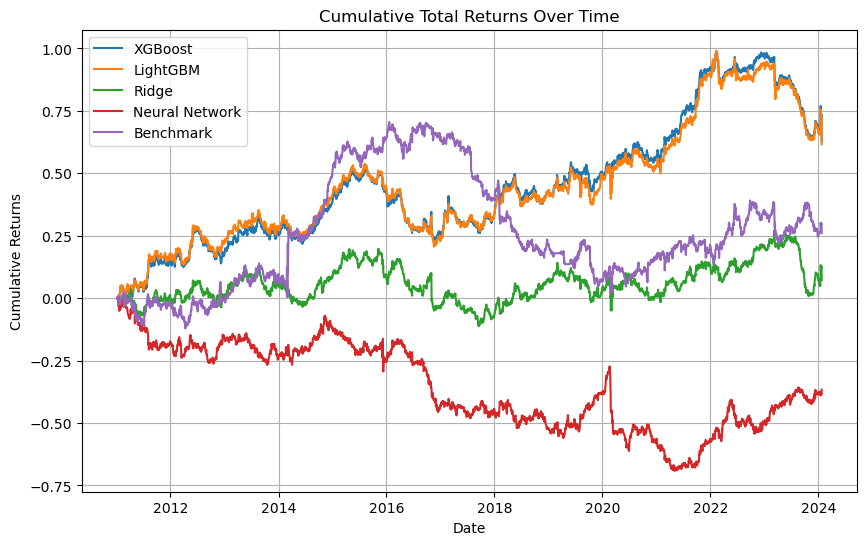

In [13]:
import matplotlib.pyplot as plt

# Sum the returns across all assets for each day to get the daily total returns for each model
xgb_total_returns = xgb_returns.sum(axis=1)
lgb_total_returns = lgb_returns.sum(axis=1)
ridge_total_returns = ridge_returns.sum(axis=1)
NN_total_returns = NN_returns.sum(axis=1)
benchmark_total_returns = benchmark_returns.sum(axis=1)
# Calculate the cumulative total returns for each model
#xgb_cumulative_total_returns = (1 + xgb_total_returns).cumprod() - 1
#lgb_cumulative_total_returns = (1 + lgb_total_returns).cumprod() - 1
#ridge_cumulative_total_returns = (1 + ridge_total_returns).cumprod() - 1
#NN_cumulative_total_returns = (1 + NN_total_returns).cumprod() - 1

# use cumsum 
xgb_cumulative_total_returns = xgb_total_returns.cumsum()
lgb_cumulative_total_returns = lgb_total_returns.cumsum()
ridge_cumulative_total_returns = ridge_total_returns.cumsum()
NN_cumulative_total_returns = NN_total_returns.cumsum()
benchmark_cumulative_total_returns = benchmark_total_returns.cumsum()

# Plot the cumulative total returns for each model
plt.figure(figsize=(10, 6))
plt.plot(xgb_cumulative_total_returns, label='XGBoost')
plt.plot(lgb_cumulative_total_returns, label='LightGBM')
plt.plot(ridge_cumulative_total_returns, label='Ridge')
plt.plot(NN_cumulative_total_returns, label='Neural Network')
plt.plot(benchmark_cumulative_total_returns, label='Benchmark')
plt.title('Cumulative Total Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()



In [18]:
%reload_ext autoreload
%autoreload 2
ridge_metrics = financial_metrics(ridge_total_returns, ridge_weights)
lgb_metrics = financial_metrics(lgb_total_returns, lgb_weights)
xgb_metrics = financial_metrics(xgb_total_returns, xgb_weights)
NN_metrics = financial_metrics(NN_total_returns,NN_weights )
benchmark_metrics = financial_metrics(benchmark_total_returns, benchmark_weights)
metrics = {
    "Ridge": ridge_metrics,
    "LightGBM": lgb_metrics,
    "XGBoost": xgb_metrics,
    "Neural Network": NN_metrics,
    "Benchmark": benchmark_metrics
}

metrics_df = pd.DataFrame(metrics).T  


In [19]:
metrics_df

,Average Yearly Return,Average Yearly Standard Deviation,Yearly Sharpe Ratio,Max Drawdown,Yearly Volatility,Calmar Ratio,Skewness,Kurtosis,Yearly Trades,Yearly Turnover,Yearly Transaction Costs
Ridge,0.005426,0.113581,0.047776,-145.847955,0.113581,0.000037,-0.699715,7.661238,488.214286,97.538442,0.009754
LightGBM,0.046273,0.124913,0.370441,-0.987334,0.124913,0.046867,-0.884670,13.341787,460.785714,209.291579,0.020929
XGBoost,0.047173,0.122719,0.384395,-0.987334,0.122719,0.047778,-0.938639,14.786409,466.714286,215.286981,0.021529
Neural Network,-0.027502,0.117808,-0.233450,-199.529603,0.117808,-0.000138,-0.725978,10.448134,479.142857,216.600990,0.021660
Benchmark,0.019548,0.152953,0.127805,-6.327117,0.152953,0.003090,1.864869,68.753205,283.000000,49.675345,0.004968


In [20]:
xgb_turnover = xgb_weights.diff().abs().sum(axis=1)  # Daily turnover
ridge_turnover = ridge_weights.diff().abs().sum(axis=1)
lgb_turnover = lgb_weights.diff().abs().sum(axis=1)
NN_turnover = NN_weights.diff().abs().sum(axis=1)
bench_turnover = benchmark_weights.diff().abs().sum(axis=1)


xgb_trans_cost = xgb_turnover * 0.01 * 0.01  # Daily transaction costs
ridge_trans_cost = ridge_turnover * 0.01 *0.01
lgb_trans_cost = lgb_turnover * 0.01 * 0.01
NN_trans_cost = NN_turnover * 0.01 * 0.01
bench_trans_cost = bench_turnover * 0.01 * 0.01

xgb_adjusted_returns = xgb_total_returns - xgb_trans_cost  # Adjusted returns after transaction costs
ridge_adjusted_returns = ridge_total_returns - ridge_trans_cost
lgb_adjusted_returns = lgb_total_returns - lgb_trans_cost
NN_adjusted_returns = NN_total_returns - lgb_trans_cost
bench_adjusted_returns = benchmark_total_returns - bench_trans_cost

xgb_cumulative_total_returns_post_cost = xgb_adjusted_returns.cumsum()  # Cumulative total returns after transaction costs
ridge_cumulative_total_returns_post_cost = ridge_adjusted_returns.cumsum()
lgb_cumulative_total_returns_post_cost = lgb_adjusted_returns.cumsum()
NN_cumulative_total_returns_post_cost = NN_adjusted_returns.cumsum()
bench_cumulative_total_returns_post_cost = bench_adjusted_returns.cumsum()



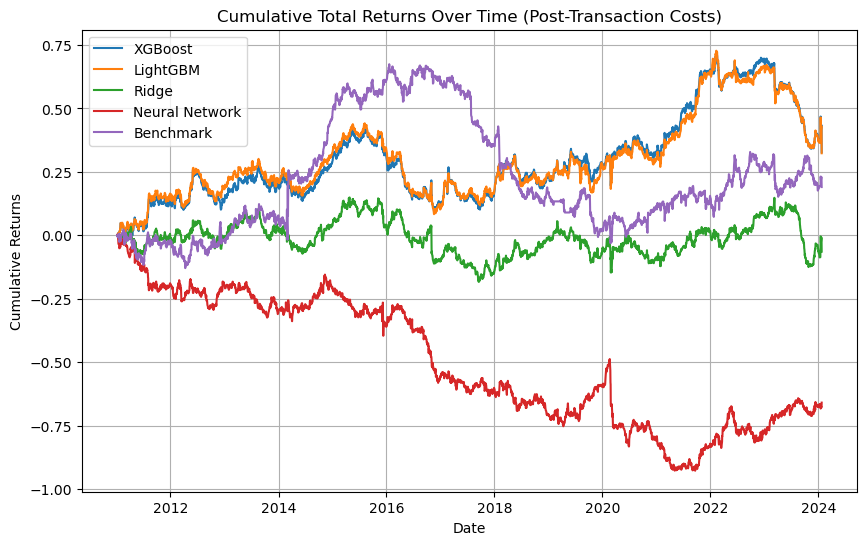

In [21]:



# Plot the cumulative total returns for each model
plt.figure(figsize=(10, 6))
plt.plot(xgb_cumulative_total_returns_post_cost, label='XGBoost')
plt.plot(lgb_cumulative_total_returns_post_cost, label='LightGBM')
plt.plot(ridge_cumulative_total_returns_post_cost, label='Ridge')
plt.plot(NN_cumulative_total_returns_post_cost, label='Neural Network')
plt.plot(bench_cumulative_total_returns_post_cost, label='Benchmark')
plt.title('Cumulative Total Returns Over Time (Post-Transaction Costs)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

